In [2]:
!pip install -q snscrape==0.3.4
import os
import pandas as pd
from datetime import date

today = date.today()
end_date =today

search_term = 'farmlaws'
from_date = '2021-09-01'
#Total Number of Tweets for Search Terms

os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

#Extracting Exact Tweeets

max_results = 1000

extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

Number Of Tweets : 22863
(0, "'#FarmLaws_Unconstitutional'")
(1, "'The Great Divider Moti has used Farm Laws to create Injustice against Farmers. Water Cannons and Lathi Charge were also used to suppress them for speaking against Injustice. #FarmLaws_InjusticeByModi https://t.co/0I3pBi1Ccd'")
(2, "'🙏🙏ਸਾਰੀ ਸੰਗਤ ਨੂੰ ਗੁਰਪੁਰਬ ਦੀਆ ਬੋਹੁਤ ਬੋਹੁਤ ਮੁਬਾਰਕਾ🙏🙏🙏\\n#Waheguruji \\n#FarmersProtest \\n#FarmLaws_InjusticeByModi \\n#FreeJaggiNow https://t.co/QCrbFEEMrW'")
(3, "'#Farmers #FarmLaws_InjusticeByModi #FarmersProtest #Worlds2021 https://t.co/CDll5aICEd'")
(4, "'#FarmLaws_InjusticeByModi'")
(5, "'@Kisanektamorcha #FarmLaws_InjusticeByModi'")
(6, "'ਵਾਹਿਗੁਰੂ ਜੀ ਕਾ ਖਾਲਸਾ ॥\\nਵਾਹਿਗੁਰੂ ਜੀ ਕੀ ਫਤਿਹ ॥\\n#FarmersProtest\\n#FarmLaws_InjusticeByModi\\n☬☬ਵਾਹਿਗੁਰੂ ਰਾਖਾ☬☬☬ https://t.co/eGCvnqnDhg'")
(7, "'#2Indias @narendramodi \\n#China in India \\nAnd \\n#Farmers at Border\\n#VirDas #FarmersProtest \\n#FarmLaws_InjusticeByModi https://t.co/jVFbU1AXR1'")
(8, "'#FarmLaws_InjusticeByModi  03/12/2021 https://t.

In [3]:
dt=[]

if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
     m= dt.append(row)



x= pd.DataFrame({'tweets':dt})
x.to_csv('1.csv')

In [4]:
a= pd.read_csv('1.csv')
text1=a['tweets']

In [5]:
import string
import re
def clean_num(data):
  return re.sub('[0-9]+', ' ',data)

a['tweets']= a['tweets'].apply(lambda x: clean_num(x))

def clean_url(data):
  return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)

a['tweets']= a['tweets'].apply(lambda x: clean_url(x))

eng_punctuations= string.punctuation
punct_list=eng_punctuations
def clean_punct(text):
  translator= str.maketrans(' ', ' ', punct_list)
  return text.translate(translator)

a['tweets']= a['tweets'].apply(lambda x: clean_punct(x))

a['tweets'].sample(50)

864        ka gas cylinder plus   ka cylindern FarmLa...
279                         FarmLawsInjusticeByModi 💯💯  
982      harpal  Keep supporting FarmersnFarmLawsInju...
462      SandeepcNews  क्रिप्टोकरंसी हमारे नौजवानो को...
741      Hashtag for today    n nFarmLawsInjusticeByM...
552      ਲੜਾਂਗੇ n       ਅੜਾਂਗੇ n              ਜਿੱਤਾਂਗ...
648      Only state in India where there is truly a f...
956      FarmLawsInjusticeByModi FarmersProtest savef...
202      If you can’t do good to others you have no r...
78       जन जागरूक अभियान कैथल। किसान मजदूर एकता जिंद...
836      Harpree  FarmLawsInjusticeByModi nGood job 👍...
963      SimiiCHD Please dont copy exactlyotw it goes...
118                Farmers never go back without victory
74            No Farmers No Food FarmLawsInjusticeByModi
549      Stand With FarmersnnFarmLawsInjusticeByModin...
755      Read that againnnShawnnpaytmlistingnHBDNayan...
981        Agriculture Not Only Gives Riches To A Nation
325                            

In [6]:
from nltk.stem import WordNetLemmatizer 
import nltk
lm= nltk.WordNetLemmatizer()
nltk.download('wordnet')

def lemmatizee(data):
  text= [lm.lemmatize(word) for word in data]
  return data

a['tweets']=a['tweets'].apply(lambda x:lemmatizee(x))
a['tweets'].sample(100)

t=a['tweets']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features= 1000)
x= cv.fit_transform(t).toarray()

count=pd.DataFrame(x, columns=cv.get_feature_names())
count.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aamnagrik,abhijeetrld,about,act,active,acts,actually,adani,affi,again,against,agricultural,agriculture,ajayraj,all,allow,ally,almost,along,also,always,am,amankaur,amaravatifarmersmarch,ambani,amendments,amitshah,ammyvirk,amp,an,and,ani,annukhuntla,anti,antifarmerbjp,anvirchahal,any,anything,apathetic,...,ਰਪ,ਰਮ,ਰਵ,ਰਸ,ਰਹ,ਲਈ,ਲਕ,ਲਤ,ਲਦ,ਲਮ,ਲਵ,ਲਸ,ਲੜ,ਵਰਗ,ਵਲ,ਸਕ,ਸਕਦ,ਸਘ,ਸਜ,ਸਤ,ਸਨ,ਸਪ,ਸਬ,ਸਬਰ,ਸਭ,ਸਮ,ਸਮਝ,ਸਰਕ,ਸਲ,ਸਵ,ਸਹ,ਸੜਕ,ਹਟ,ਹਣ,ਹਥ,ਹਨ,ਹਨਤ,ਹਮ,ਹਰ,ਹੜ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2673 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2596 missing from current font.
  font.set_text(s

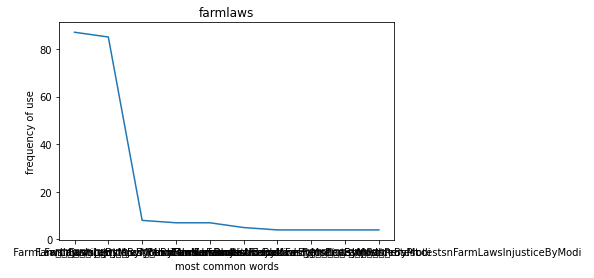

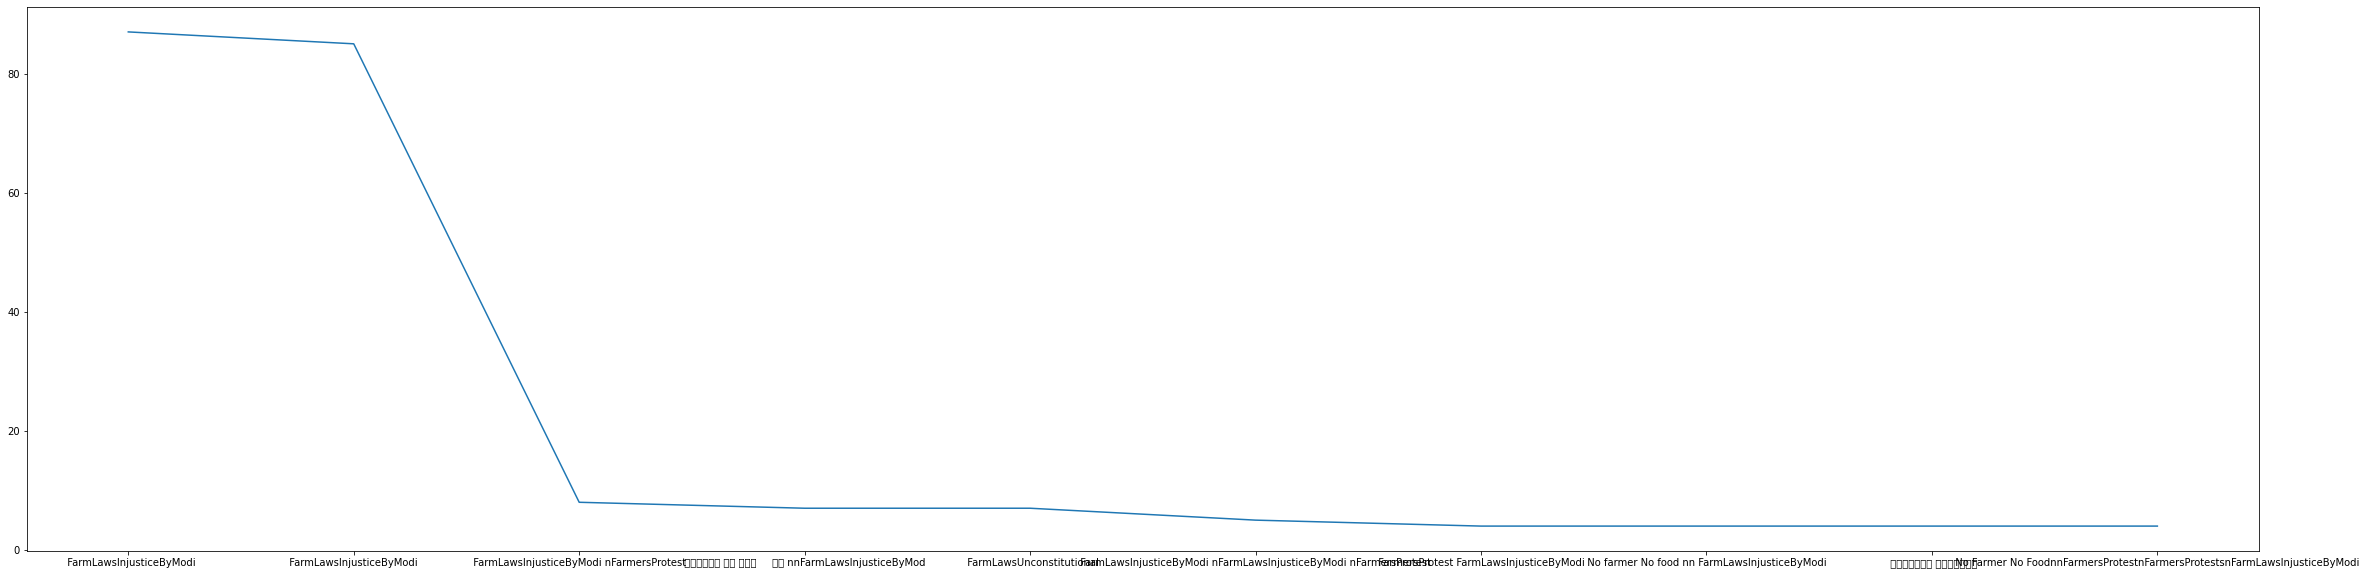

In [48]:
import matplotlib.pyplot as plt
plt.plot(m[:10])
plt.title(search_term)
plt.xlabel('most common words')
plt.ylabel('frequency of use')
plt.figure(figsize= (40,10))
display(plt.plot(m[:10]))